In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [233]:
url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
df1 = pd.read_csv(url)
del df1['Unnamed: 0']

In [234]:
df1.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [235]:
url2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
df2 = pd.read_csv(url2)
del df2['origin']
del df2['Unnamed: 0']

In [236]:
df2.head(10)

,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
5,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
6,2013,1.0,1.0,7.0,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0
7,2013,1.0,1.0,8.0,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0
8,2013,1.0,1.0,9.0,39.92,28.04,62.21,250.0,12.65858,14.567241,0.0,1012.2,10.0
9,2013,1.0,1.0,10.0,39.02,28.04,64.43,260.0,12.65858,14.567241,0.0,1011.9,10.0


In [237]:
df=df1.merge(df2,on=['year','month','day','hour'],how='inner')

In [238]:
df.iloc[:,:8].head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier
0,2013,1,1,600.0,0.0,851.0,-7.0,B6
1,2013,1,1,600.0,0.0,837.0,12.0,MQ
2,2013,1,1,601.0,1.0,844.0,-6.0,B6
3,2013,1,1,602.0,-8.0,812.0,-8.0,DL
4,2013,1,1,602.0,-3.0,821.0,16.0,MQ


In [239]:
df.iloc[:, 8:].head()

,tailnum,flight,origin,dest,air_time,distance,hour,minute,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,N595JB,371,LGA,FLL,152.0,1076,6.0,0.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
1,N542MQ,4650,LGA,ATL,134.0,762,6.0,0.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
2,N644JB,343,EWR,PBI,147.0,1023,6.0,1.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
3,N971DL,1919,LGA,MSP,170.0,1020,6.0,2.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
4,N730MQ,4401,LGA,DTW,105.0,502,6.0,2.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0


ТЕПЕРЬ К ИССЛЕДОВАНИЮ:

№1 Исследую зависимость задержки рейса от скорости ветра 

In [240]:
p=df.loc[:, ['dep_delay','wind_speed']].groupby('wind_speed').mean()

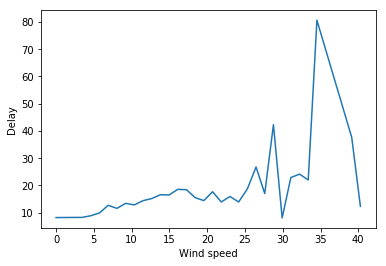

In [241]:
plt.plot(list(p.index[:-1]),list(p['dep_delay'])[:-1])
plt.xlabel('Wind speed')
plt.ylabel('Delay')
plt.show()

Вывод: Можно наблюдать ожидаемую корреляцию - чем выше скорость, тем вероятнее что задержка будет более продлжительной. Это значит ,что если прогназируется ветренняя погода, то аэропортам нужно привлекать в такие дни больше сотрудников, тк скорее всего и пассажиров будет гуще, чем обычно

№2 Исследуем зависимость процента рейсов с задержкой более 10 минут (от общего числа) от времени суток

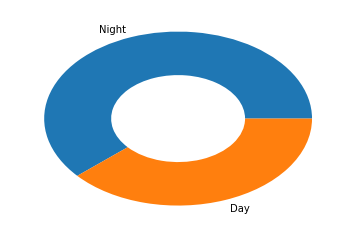

In [242]:
ten=df.loc[:, ['dep_delay','hour']]
tenD=ten[(ten['hour']>6)&(ten['hour']<18)]
D=tenD.shape[0]
tenN=ten[(ten['hour']<=6)|(ten['hour']>=18)]
N=tenN.shape[0]
tenDP=tenD[tenD['dep_delay']>10]
tenNP=tenN[tenN['dep_delay']>10]
DP=tenDP.shape[0]
NP=tenNP.shape[0]
mo=DP/D
ng=NP/N
plt.pie([ng/(mo+ng),mo/(mo+ng)],labels=['Night','Day'],wedgeprops=dict(width=0.5))
plt.show()

Вывод: Процент задержек ночью больше чем днём, значит аэропортам также стоит ожидать скопления людей, значит рейсы нужно делать реже (так и есть судя по таблице)

№3 Исследуем зависимость длины задержек от температуры

In [243]:
p=df.loc[:, ['dep_delay','temp']].groupby('temp').mean()

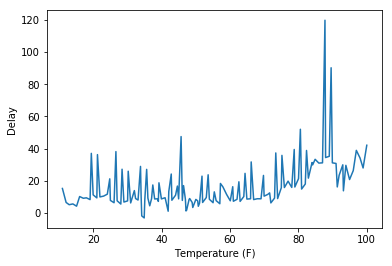

In [244]:
plt.plot(list(p.index),list(p['dep_delay']))
plt.xlabel('Temperature (F)')
plt.ylabel('Delay')
plt.show()

Вывод: Из графика делаем вывод, что распределение длины задержек более менее равномерно, но всё же в тёплое время она немного выше, а значит летом стоит увиличивать интервал между рейсами,чтоб не создавать столпотворение

№4 Исследуем зависимость числа задержек более 10 минут от времени года:

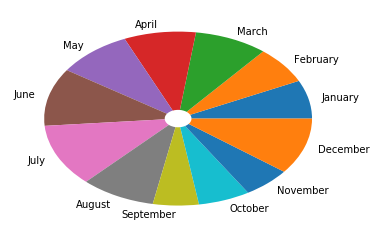

In [245]:
ten=df.loc[:, ['dep_delay','month']]
ten["Quantity"]=ten['dep_delay']>10
l=list(ten.groupby('month')['Quantity'].sum())
plt.pie(l,labels=['January','February','March','April','May','June','July','August','September','October','November','December'],wedgeprops=dict(width=0.9))
plt.show()

Вывод: в весенние и летние месяцы частота задержек(более 10 мин) выше, это может дать намёк на то, что в это время года стоит нанимать больше рабочих, для того чтоб не было проблем с обслуживанием в аэропортах, при скоплении людей

№5 Исследуем зависимость количества задержек от дня месяца

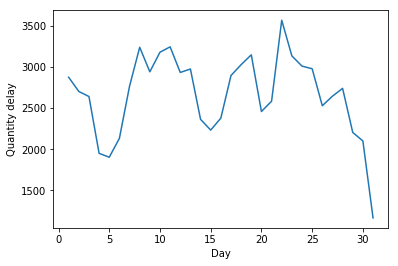

In [246]:
ten=df.loc[:, ['dep_delay','day']]
ten["Quantity"]=ten['dep_delay']>10
p=ten.groupby('day')['Quantity'].sum()
plt.plot(list(p.index),list(p))
plt.xlabel('Day')
plt.ylabel('Quantity delay')
plt.show()

Вывод: корреляции между количеством опозданий и днем месяца почти нет, поэтому в этом направлении не стоит работать

№6 Исследуем зависимость длины задержек от продолжительности полёта:

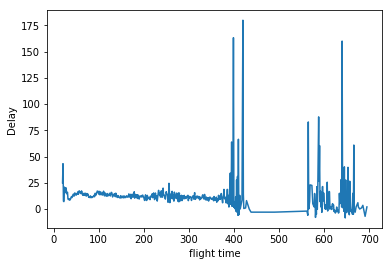

In [247]:
p=df.loc[:, ['dep_delay','air_time']].groupby('air_time').mean()
plt.plot(list(p.index),list(p['dep_delay']))
plt.xlabel('flight time')
plt.ylabel('Delay')
plt.show()

Вывод: чем длиннее время полёта, тем больше вероятность, что рейс надолго задержут, а значит аэропортам нужно учитывать это при составлении гафика работникам

№7 Исследую зависимость задержки рейса от скорости порывов ветра

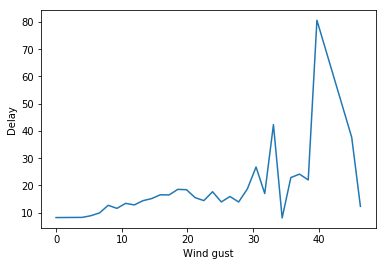

In [248]:
p=df.loc[:, ['dep_delay','wind_gust']].groupby('wind_gust').mean()
plt.plot(list(p.index[:-1]),list(p['dep_delay'])[:-1])
plt.xlabel('Wind gust')
plt.ylabel('Delay')
plt.show()

Вывод: Корреляция идентична корреляции со скоростью ветра и соответственно вывод такой же: Можно наблюдать ожидаемую корреляцию - чем сильнее порывы, тем вероятнее что задержка будет более продлжительной. Это значит ,что если прогназируется втренняя погода, то аэропортам нужно привлекать в такие дни больше сотрудников, тк скорее всего и пассажиров будет гуще, чем обычно

№8 Исследуем у какой авиакомпании задержки самые долгие. 

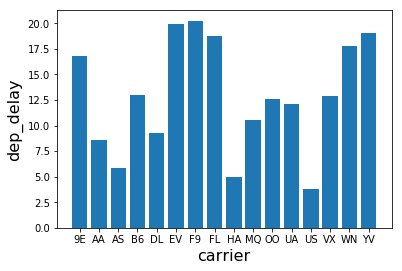

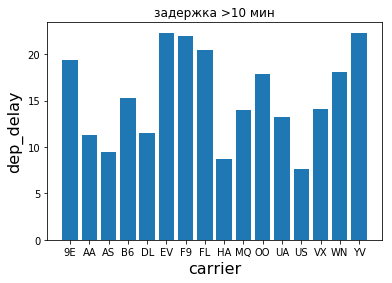

In [250]:
df['1']=np.ones(len(df['year']))
c = np.sort(df['carrier'].unique())
b=df.groupby('carrier')['dep_delay'].mean()
plt.bar(c,b)
plt.ylabel('dep_delay',fontsize=16)
plt.xlabel('carrier',fontsize=16)
plt.show()

ddd=df.groupby('carrier')['1'].sum()
dd=df.drop(df[df.dep_delay < 10].index)
b=dd.groupby('carrier')['dep_delay'].sum()/ddd
plt.bar(c,b)
plt.title('задержка >10 мин')
plt.ylabel('dep_delay',fontsize=16)
plt.xlabel('carrier',fontsize=16)
plt.show()

Вывод: на основе этой диаграмма составить рейтинг компаний по которому можну выбрать компанию вераятность задержки которой минимальна(например EV или YV)

№9 Исследуем в каком аэропорту задержки самые долгие.

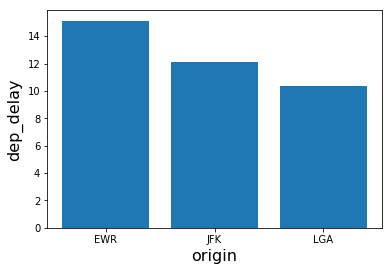

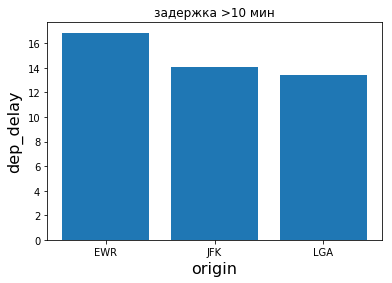

In [253]:
c = np.sort(df['origin'].unique())
#print(c)
b=df.groupby('origin')['dep_delay'].mean()
ddd=df.groupby('origin')['1'].sum()
#print(b)
#print(b.shape)
plt.bar(c,b)
plt.ylabel('dep_delay',fontsize=16)
plt.xlabel('origin',fontsize=16)
plt.show()

dd=df.drop(df[df.dep_delay < 10].index)
#print(dd.head)
b=dd.groupby('origin')['dep_delay'].sum()/ddd
#print(b)
plt.bar(c,b)
plt.title('задержка >10 мин')
plt.ylabel('dep_delay',fontsize=16)
plt.xlabel('origin',fontsize=16)
plt.show()

Вывод: аэропорт EWR самый проблематичный, поэтому руководству этого аэропорта нужно что-то предпринять, чтоб не потерять клиентов

№10 Исследуем зависимость количества задержек времени(часов):

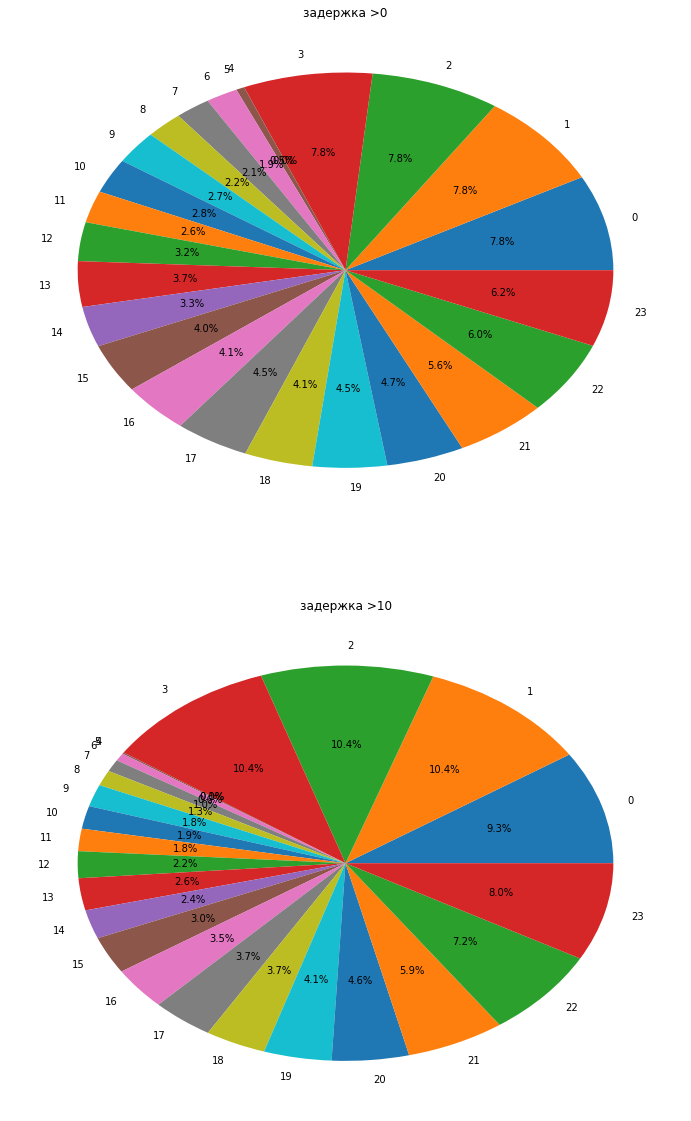

In [257]:
a=np.zeros(24)
aa=np.zeros(24)
с=np.arange(24)
db=df.groupby('hour')['1'].sum()
#np.delete(db, 0)
#print(db)
df.groupby('hour')['1'].sum()
dd=df.drop(df[df.dep_delay < 0].index)
ddd=df.drop(df[df.dep_delay < 10].index)
dd=dd.groupby('hour')['1'].sum()
#print(dd)
ddd=ddd.groupby('hour')['1'].sum()
#print(ddd)
a=dd/db
a=a.fillna(0)
#print(a)
aa=ddd/db
aa=aa.fillna(0)
#print(aa)

fig, axes = plt.subplots(nrows = 2, ncols =1 )
axes[0].set(title='задержка >0')
axes[0].pie(a,labels=с,autopct='%1.1f%%')
axes[1].set(title='задержка >10')
axes[1].pie(aa,labels=с,autopct='%1.1f%%')
fig.set_figwidth(12)
fig.set_figheight(20) 
plt.show()

Вывод: Ночное время(22:00-3:00) самое проблемное, поэтому нужно создавать соответствующий график для работников аэропорта, качество обслужевания в этот период не ухудшилось